In [1]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv(r"Iris.csv")
data.drop("Id", axis=1, inplace=True)
data.drop_duplicates(inplace=True)
data["Species"] = data["Species"].map({"Iris-versicolor":0,"Iris-virginica":1,"Iris-setosa":-1})
# data["Species"].value_counts()
data = data[data["Species"] != 0]

In [10]:
class Perceptron:
    '''使用Python语言实现感知器算法'''
    
    def __init__(self, alpha, times):
        self.alpha = alpha
        self.times = times
        
    def step(self, z):
        '''阶跃函数
        
        Parameters
        ----
        z:数组或者标量
            阶跃函数的参数，可以将z映射成1或者-1
        
        Returns
        ----
        value: int
            如果z>=0,返回1，否则返回-1
        '''
        
        return np.where(z >=0, 1, -1)
    
    def fit(self, X, y):
        
        X = np.asarray(X)
        y = np.asarray(y)
        
        self.w_ = np.zeros(1 + X.shape[1])
        
        self.loss_ = []
        
        for i in range(self.times):
            # 逻辑回归中，使用所有样本计算梯度，然后更新权重
            # 而感知器中，是使用单个样本，依次进行计算梯度，更新权重
            loss = 0
            for x, target in zip(X, y):
                # 计算预测值
                y_hat = self.step(np.dot(x, self.w_[1:]) + self.w_[0])
                loss += y_hat != target
                #更新权重:w(j) = w(j) + 学习率 * (真实值 - 预测值) * x(j)
                # 例如，结果应该是1，但是返回了-1，这证明x重要的特征对应w的权重较低，所以要增加w中x重要的特征，所以用(target - y_hat) * x来更新权重
                # 反之如果应该是-1，但是返回了1，就需要降低x相应重要特征的权重，这个时候加一个负数，也就达到了降低的效果
                self.w_[0] += self.alpha * (target - y_hat)
                self.w_[1:] += self.alpha * (target - y_hat) * x
                
            self.loss_.append(loss)
            
    def predict(self, X):
        '''根据参数传递样本'''
        
        return self.step(np.dot(X, self.w_[1:]) + self.w_[0])

In [13]:
t1 = data[data["Species"] == 1]
t2 = data[data["Species"] == -1]
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)

train_X = pd.concat([t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([t1.iloc[:40, -1], t2.iloc[:40, -1]], axis=0)
test_X = pd.concat([t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t1.iloc[40:, -1], t2.iloc[40:, -1]], axis=0)

p = Perceptron(0.1, 10)
p.fit(train_X, train_y)
result = p.predict(test_X)

display(result)
display(p.loss_)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

[1, 2, 3, 2, 0, 0, 0, 0, 0, 0]

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 设置中文显示
mpl.rcParams["font.family"] = "Droid Sans Fallback"
mpl.rcParams["axes.unicode_minus"] = False

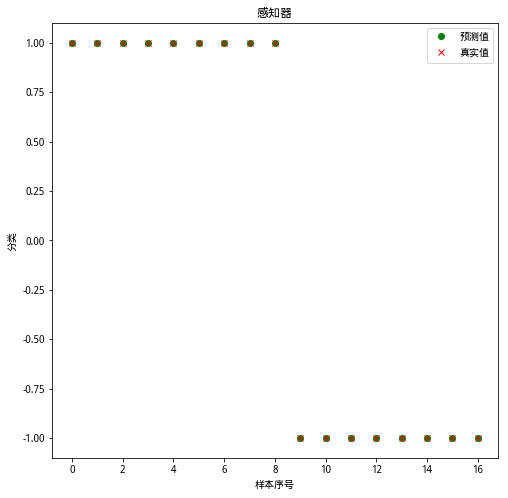

In [18]:
plt.figure(figsize=[8,8])
#绘制预测值
plt.plot(result, "go", label="预测值")
plt.plot(test_y.values, 'rx', label="真实值")
plt.title("感知器")
plt.xlabel("样本序号")
plt.ylabel("分类")
plt.legend()
plt.show()

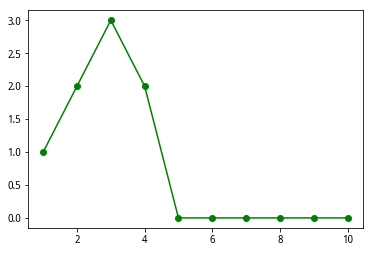

In [21]:
plt.plot(range(1, p.times +1), p.loss_, "go-")